In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#df

In [ ]:
#features=df.drop("income",axis=1)
#features

In [ ]:
#target = df.columns["income"]

In [5]:
# observe the names of the columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.income.nunique()

2

In [7]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [8]:
data.income.value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
(data=="?").sum()

C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# seperate the features and targets 
features = data.drop("income",axis=1)
target =data["income"]


### numerical data analysis

In [12]:
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# add a new row  for the previous output
# with lable range and values are max-min of that column

In [14]:
num_desc =features.describe()
num_desc.loc["range"] =num_desc.loc["max"]-num_desc.loc["min"]
num_desc 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
range,73.000000,1.478115e+06,15.000000,99999.000000,4356.000000,98.000000


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210391DD708>,
      dtype=object)

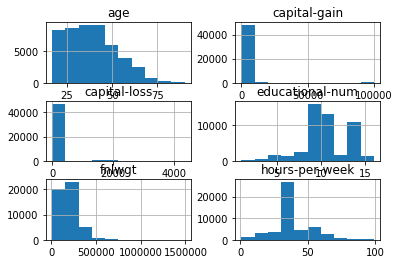

In [16]:
features.hist()

In [17]:
features["capital-gain"]=np.log1p(features["capital-gain"])
features["capital-loss"]=np.log1p(features["capital-loss"])

Text(0, 0.5, 'frequency')

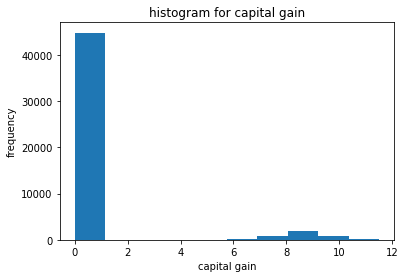

In [18]:
plt.hist(features["capital-gain"])
plt.title("histogram for capital gain")
plt.xlabel("capital gain")
plt.ylabel("frequency")
#plt.xticks(bin_values[1][::2])

Text(0, 0.5, 'frequency')

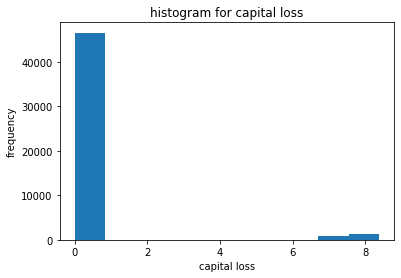

In [19]:
plt.hist(features["capital-loss"])
plt.title("histogram for capital loss")
plt.xlabel("capital loss")
plt.ylabel("frequency")

###  apply scaling for all numerical columns

In [20]:
num_cols = features.columns[features.dtypes !=object]
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

features[num_cols] = sc.fit_transform(features[num_cols])

In [22]:
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.120004,0.605206,0.063281,0.041885,0.402269
std,0.187815,0.071445,0.171398,0.212412,0.189298,0.126443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071216,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112210,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152462,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021039DC9DC8>,
      dtype=object)

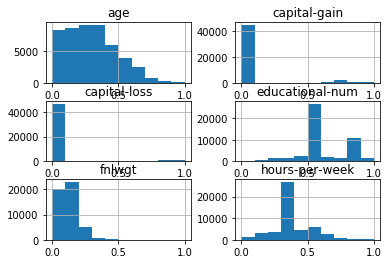

In [23]:
features.hist()

### catagorical columns preprocessing

In [24]:
cat_cols = features.columns[features.dtypes ==object]
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [25]:
features[cat_cols].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
dtype: int64

In [26]:
features[cat_cols].nunique().sum()

102

#### after aplying one hot encoding or pd.get _dummies they will generate 102 newmcolummns which will added in the output dataframe.

In [27]:
features.shape[1]+features[cat_cols].nunique().sum()-len(cat_cols)

108

In [28]:
features =pd.get_dummies(features)

In [29]:
features.shape

(48842, 108)

In [30]:
features.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)

In [31]:
data.gender[:5]

0      Male
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [32]:
features[["gender_Male","gender_Female"]][:5]

,gender_Male,gender_Female
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [33]:
features.iloc[:,31:38]

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0
48838,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,1
48840,0,0,0,0,1,0,0


### convert the target  into binary

In [34]:
target.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [35]:
target.apply(lambda x:0 if x=="<=50K" else 1)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [36]:
target.apply(lambda x:0 if x=="<=50K" else 1).value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [37]:
target =target.apply(lambda x:0 if x=="<=50K" else 1)
target.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [38]:
#split the data set into two parts 80% training 20% testing

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state =23)

In [41]:
y_train.value_counts(normalize=True)

0    0.758708
1    0.241292
Name: income, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

0    0.768758
1    0.231242
Name: income, dtype: float64

### Apply Gaussian NB

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb =GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
#predict the class for test data
y_pred = nb.predict(x_test)
f1_score(y_pred,y_test)

0.5195453977769452

### Apply KNeighbor classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred = knn.predict(x_test)
f1_score(y_pred,y_test)

0.6072985999540967

### Apply SGDClassifier

In [48]:
from sklearn.linear_model import SGDClassifier
sgdc =SGDClassifier()
sgdc.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
y_pred = sgdc.predict(x_test)
f1_score(y_pred,y_test)

0.6424511984185817

### Apply LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = lr.predict(x_test)
f1_score(y_pred,y_test)

0.6433734939759036

### Tasks
1. Apply all the above algorithms for scaled numerical features
2. Apply all the above algorithms forcategorical features
3. Convert all the categorical columns using Label Encoder and create a dataframe. Apply 
  suitable Naivebayes Algorithm.
4. Compare all the algorithms output



In [55]:
num_features = features[num_cols]
num_features

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.777174,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918
...,...,...,...,...,...,...
48837,0.136986,0.165763,0.733333,0.000000,0.0,0.377551
48838,0.315068,0.096129,0.533333,0.000000,0.0,0.397959
48839,0.561644,0.094462,0.533333,0.000000,0.0,0.397959
48840,0.068493,0.128004,0.533333,0.000000,0.0,0.193878


In [56]:
x_train_sc,x_test_sc,y_train_sc,y_test_sc=train_test_split(features,target,test_size=0.2,random_state =23)

#### Apply Gaussian NB

In [57]:
nb =GaussianNB()
nb.fit(x_train_sc,y_train_sc)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:

y_pred = nb.predict(x_test_sc)
f1_score(y_pred,y_test_sc)

0.4029511918274688

#### Apply KNeighbor classifier



In [60]:
knn = KNeighborsClassifier()

knn.fit(x_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')